In [1]:
import pandas as pd

## Data Collection and Loading

In [2]:
# Url of the data set
url = "https://raw.githubusercontent.com/duochen/data-science-bootcamp/refs/heads/main/Data/insurance.csv"

# Load the dataset
data = pd.read_csv(url)

# First few rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

###  Quick Glance at the Data

In [3]:
# Print a concise summary of the DataFrame:
# shows column names, non-null counts, data types, and memory usage.
data.info()

# Compute descriptive statistics for numeric columns:
# count, mean, std, min, 25%, 50% (median), 75%, and max.
# (Use include='all' to include non-numeric columns, too.)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Missing Values

In [4]:
# Count missing values in each column of a DataFrame named `data`
# 1) .isnull() creates a Boolean mask: True where values are NaN/None, else False
# 2) .sum() adds Trues (treated as 1) column-wise, returning a Series of counts per column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Distribution of the Target (Charges)

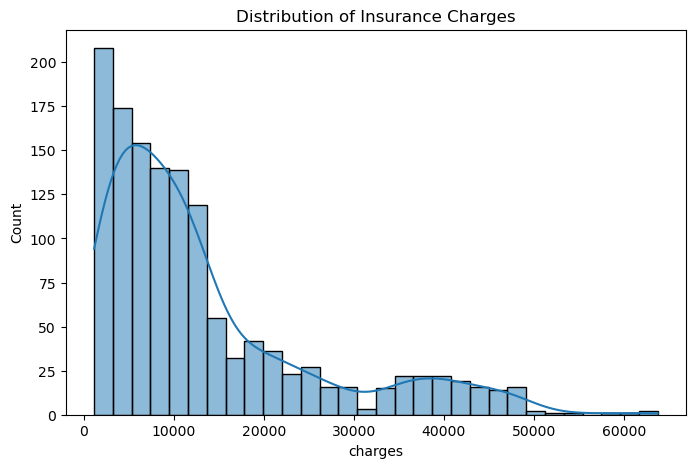

In [5]:
# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Set the size of the figure to 8 inches wide and 5 inches tall
plt.figure(figsize=(8, 5))

# Create a histogram of the 'charges' column from the data DataFrame
# 'kde=True' adds a Kernel Density Estimate line to show the distribution shape
sns.histplot(data['charges'], kde=True)

# Set the title of the plot
plt.title('Distribution of Insurance Charges')

# Display the plot
plt.show()

Note: Medical charges are often right-skewed, reflecting some individuals with very high costs.

## Data Preprocessing

### Encoding Categorical Variables

In [6]:
# 1. Encoding 'sex' and 'smoker' using map
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# 2. One-Hot Encoding 'region' without dropping first
# (drop_first=True to avoid dummy variable trap)
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Show the transformed DataFrame
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


### Feature and Target Separation

In [7]:
# Split the dataset into features (X) and target/label (y)
X = data.drop('charges', axis=1)   # X: all columns except 'charges' (drop the target column)
y = data['charges']                # y: the target column we want to predict

### Correlation Analysis

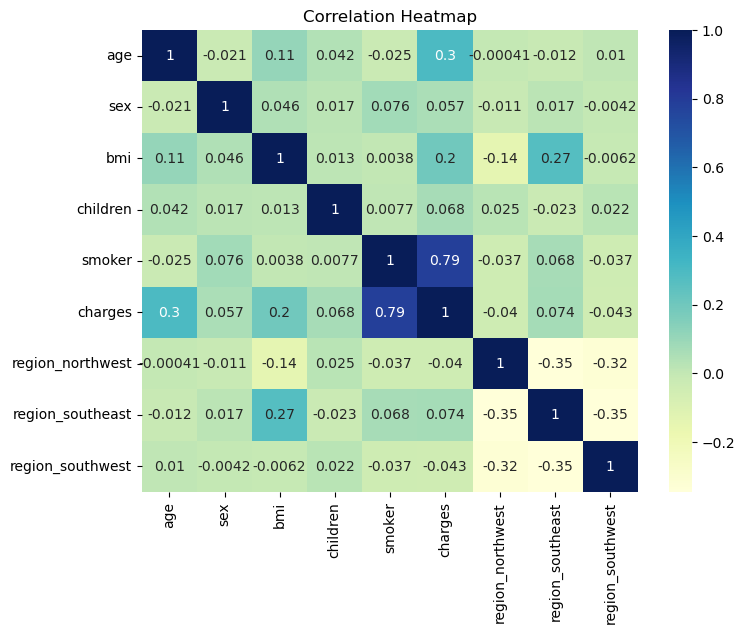

In [8]:
# Compute the pairwise Pearson correlation coefficients between all numeric columns in `data`
corr_matrix = data.corr()

# Create a new figure to control the overall size of the heatmap
plt.figure(figsize=(8, 6))

# Draw the correlation matrix as a heatmap
# - annot=True      : write the correlation values in each cell
# - cmap="YlGnBu"   : use the Yellow-Green-Blue color palette
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Add a descriptive title
plt.title('Correlation Heatmap')

# Render the plot to the screen
plt.show()

Note: Smoker, age, and BMI often show strong correlations with charges.

## Splitting the Data

In [9]:
# Import the utility to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Split features (X) and labels/target (y) into training and test sets
# - test_size=0.2: 20% of the data goes to the test set, 80% to the training set
# - random_state=42: fixed seed so the split is reproducible
# The function preserves row alignment between X and y.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## Model Building: Multiple Linear Regression

### Creating and Training the Model

In [10]:
from sklearn.linear_model import LinearRegression  # Import the linear regression estimator

# Instantiate a LinearRegression model with default parameters
# (ordinary least squares; fits intercept by default)
lr_model = LinearRegression()

# Fit (train) the model on your training data
# X_train: 2D array-like of shape (n_samples, n_features)
# y_train: 1D/2D array-like of shape (n_samples,) or (n_samples, n_targets)
# Assumes data is numeric, with no NaNs, and preprocessed as needed.
lr_model.fit(X_train, y_train)

# Optional: after fitting, you can inspect learned parameters or make predictions:
# coefficients = lr_model.coef_
# intercept = lr_model.intercept_
# y_pred = lr_model.predict(X_test)


LinearRegression()

### Model Coefficients and Intercept

In [11]:
# X_train: pandas DataFrame of training features
# lr_model: a **fitted** scikit-learn linear model (e.g., LinearRegression)

# Build a table pairing each feature name with its learned coefficient (slope).
coefficients = pd.DataFrame({
    'Feature': X_train.columns,      # feature names from the training DataFrame
    'Coefficient': lr_model.coef_    # corresponding weights learned by the model
})

# The model's intercept (bias term).
intercept = lr_model.intercept_

# Display both the coefficients table and the intercept.
coefficients, intercept

(            Feature   Coefficient
 0               age    256.975706
 1               sex    -18.591692
 2               bmi    337.092552
 3          children    425.278784
 4            smoker  23651.128856
 5  region_northwest   -370.677326
 6  region_southeast   -657.864297
 7  region_southwest   -809.799354,
 -11931.219050326685)

Note: This shows how each feature influences the predicted insurance charge.

## Model Evaluation

### Predictions on Test Set

In [12]:
# Use the trained model to generate predictions for the test feature set.
# - lr_model must be already fit on the training data.
# - X_test should have the same columns (and preprocessing) as the training features.
# - y_pred will be an array-like of predicted values, aligned row-by-row with X_test.
y_pred = lr_model.predict(X_test)

### Performance Metrics
Use R-squared and RMSE as primary metrics

In [13]:
# Evaluate a regression model using R-squared and RMSE

from sklearn.metrics import r2_score, mean_squared_error  # Metrics from scikit-learn
import numpy as np  # Numerical library for square root

# y_test: array-like of true target values
# y_pred: array-like of predicted values from your model (same length/order as y_test)

r2 = r2_score(y_test, y_pred)              # Coefficient of determination; 1.0 is perfect, can be negative
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error (average of squared residuals)
rmse = np.sqrt(mse)                        # Root Mean Squared Error (in the same units as the target)

print("R-squared:", r2)   # Higher is better
print("RMSE:", rmse)      # Lower is better

R-squared: 0.7835929767120724
RMSE: 5796.284659276272


### Residual Analysis

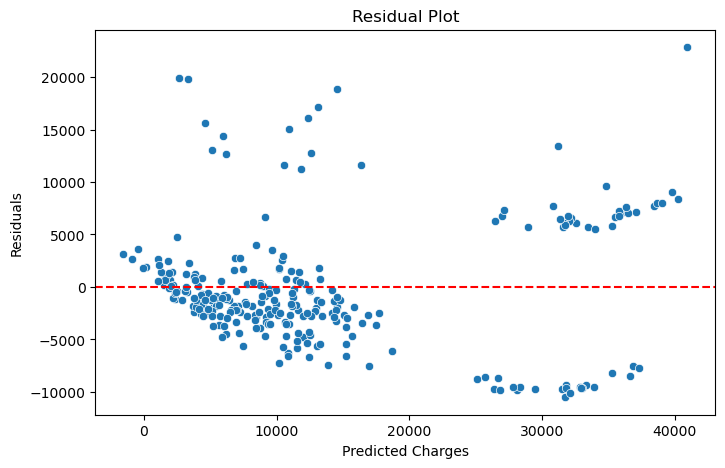

In [14]:
# Calculate residuals (actual - predicted). 
# If the model is good, these should be centered around 0 with no pattern.
residuals = y_test - y_pred

# Create a new figure with a specific size (width=8 inches, height=5 inches).
plt.figure(figsize=(8,5))

# Scatter plot of predicted values vs. residuals to diagnose model fit.
# A random cloud around y=0 (no clear shape) suggests homoscedasticity and linearity.
sns.scatterplot(x=y_pred, y=residuals)

# Add a horizontal reference line at 0 to make it easy to see deviations.
plt.axhline(y=0, color='red', linestyle='--')

# Add plot title and axis labels for clarity.
plt.title('Residual Plot')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')

# Render the plot.
plt.show()

Note: Ideally, residuals should be scattered randomly around zero.

## Interpretation of Results
* Coefficients: Positive coefficients mean that as the feature increases, the insurance charges increase.
* Model Performance: R-squared for this dataset often falls between 0.70–0.85, indicating a reasonable explanation of
variance. RMSE is often in the thousands, due to the scale of charges.
* Potential Improvements: One could add polynomial or interaction terms (e.g., smoker * bmi) or try regularization (Ridge, Lasso).

## Conclusion
* Takeaways: Multiple Linear Regression is straightforward and interpretable. Smoking status, BMI, and age are typically strong predictors of insurance cost.
* Real-World Application: Insurance companies might integrate such a model into premium pricing. Users gain insight into how personal choices or health factors affect
costs.
